<a href="https://colab.research.google.com/github/fortune-max/M4-python-refresher-ml/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem statement
Learning tasks with a teacher are divided into the following types, depending on what the set may be: **Y** all possible responses (targets):

 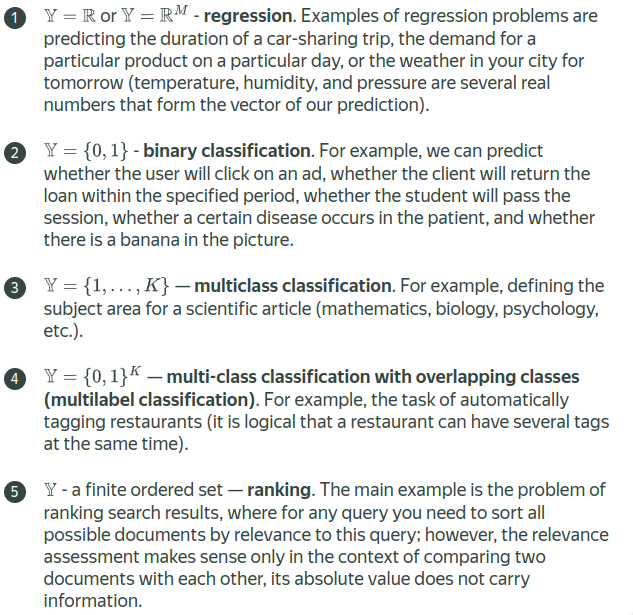



I really like this [page](https://education.yandex.ru/handbook/ml/article/mashinnoye-obucheniye), but it's in russian

## Some mportant values
- Deviation
- Variance
- Standard Deviation

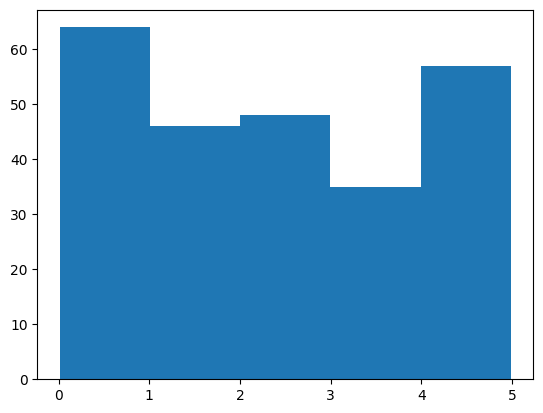

In [ ]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.uniform(0.0, 5.0, 250)

plt.hist(x, 5)
plt.show()

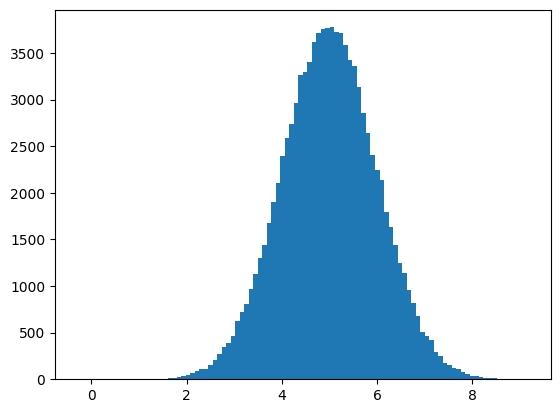

In [ ]:
import numpy
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

## Regression
The term regression is used when you try to find the relationship between variables.

In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

!cp gdrive/MyDrive/Python/DS404_Classwork/Day_4_Materials/* .
!ls

Mounted at /content/gdrive
gdrive	imports.py  Pokemon_m.csv  sample_data	titanic.csv


In [ ]:
%run imports.py

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn import decomposition

In [ ]:
from sklearn.pipeline import Pipeline

#### Exercise 1: Import datasets
- iris
- titanic
- pokemon

In [ ]:
iris = datasets.load_iris()

In [ ]:
import pandas as pd

In [ ]:
iris


In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Y'] = iris.target
iris_df

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<Axes: >

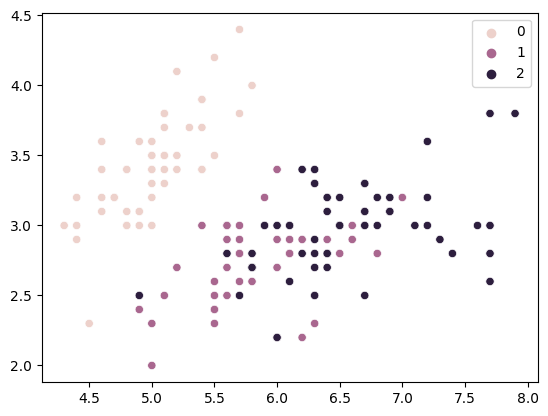

In [ ]:
sns.scatterplot(
    x = iris.data[:, 0],
    y = iris.data[:, 1],
    hue = iris.target
    )

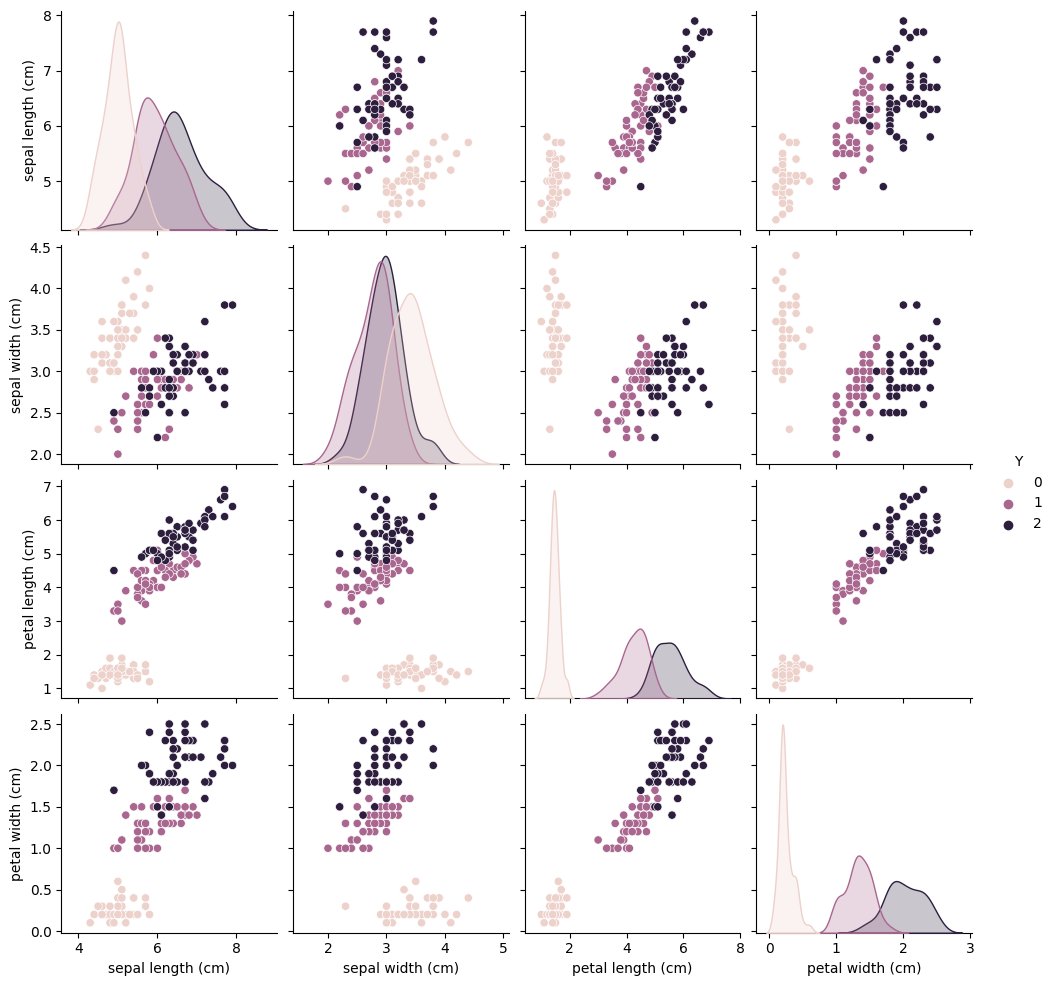

In [ ]:
sns.pairplot(
    data=iris_df,
    hue='Y',
    )

#### Exercise 2: basic pipeline

In [ ]:
our_pipeline=Pipeline(
        [('scale', preprocessing.StandardScaler()),
         ('normalize', preprocessing.Normalizer())
        ]
                     )

In [ ]:
preprocessing.StandardScaler()

StandardScaler()

In [ ]:
fited_pipeline_1 = our_pipeline.fit(iris.data)

In [ ]:
our_pipeline_2 = Pipeline(
    [('pipeline1', fited_pipeline_1),
     ('classifier', LinearRegression())])

In [ ]:
fited_regression = our_pipeline_2.fit(X = iris.data, y = iris.target)

In [ ]:
predict_data = fited_regression.predict(iris.data)

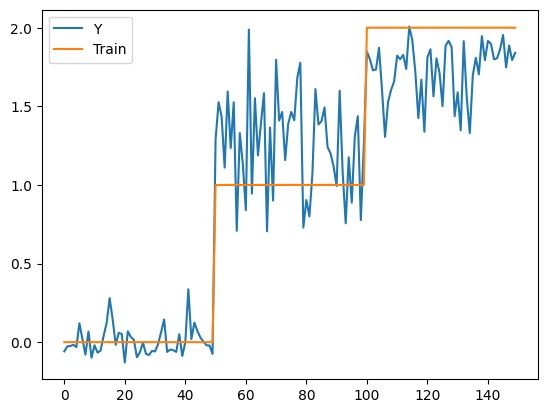

In [ ]:
plt.plot(predict_data, label = 'Y')
plt.plot(iris.target, label = 'Train')
plt.legend()

#### Excercise 3: perform operations from the lection

In [ ]:
!cat Pokemon_m.csv

In [ ]:
pokemon_df = pd.read_csv('Pokemon_m.csv')

In [ ]:
pokemon_df

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


<ipython-input-29-32fcc6c2bf11>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pokemon_df['HP'])


<Axes: xlabel='HP', ylabel='Density'>

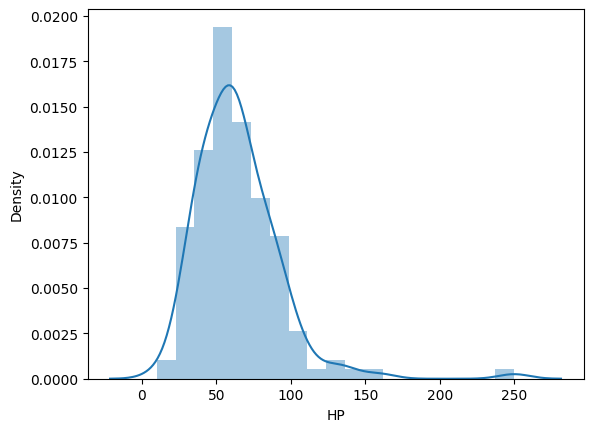

In [ ]:
sns.distplot(pokemon_df['HP'])

#### StandardScaler

In [ ]:
power_transform_st_sc = preprocessing.StandardScaler().fit(pokemon_df.drop(['Name','Type_1', 'Type_2'], axis=1))


In [ ]:
transformed_st_sc = power_transform_st_sc.transform(pokemon_df.drop(['Name','Type_1', 'Type_2'], axis=1)) [:,2]


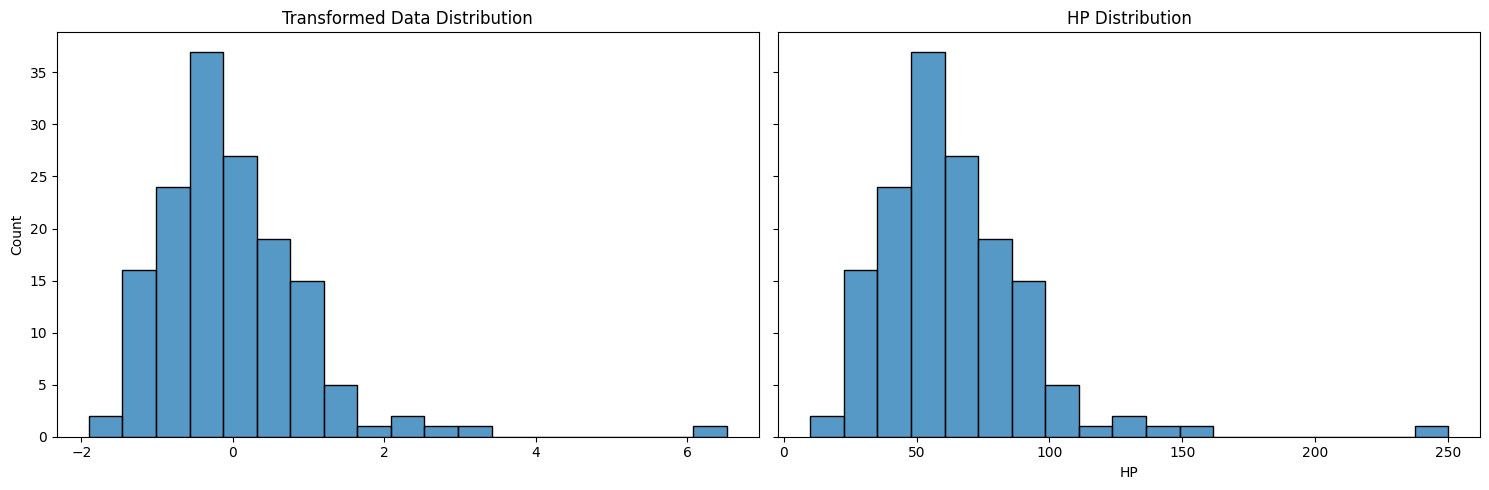

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot the distribution of transformed_st_sc on the first subplot
sns.histplot(transformed_st_sc, ax=axes[0])

# Plot the distribution of 'HP' column from pokemon_df on the second subplot
sns.histplot(pokemon_df['HP'], ax=axes[1])

# Add labels/titles as needed
axes[0].set_title('Transformed Data Distribution')
axes[1].set_title('HP Distribution')

plt.tight_layout()
plt.show()


#### MinMaxScaler

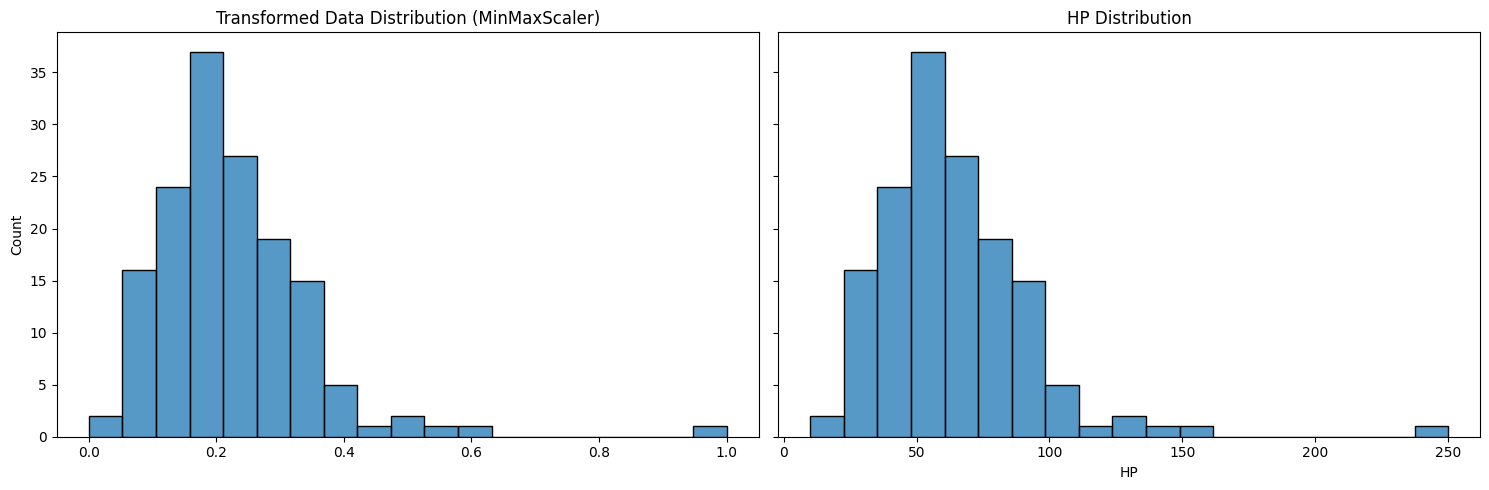

In [ ]:
# Fit the MinMaxScaler to the data and transform it
power_transform_min_max = preprocessing.MinMaxScaler().fit(pokemon_df.drop(['Name', 'Type_1', 'Type_2'], axis=1))
transformed_min_max = power_transform_min_max.transform(pokemon_df.drop(['Name', 'Type_1', 'Type_2'], axis=1))[:, 2]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot the distribution of transformed_min_max data on the first subplot
sns.histplot(transformed_min_max, ax=axes[0])

# Plot the distribution of 'HP' column from pokemon_df on the second subplot
sns.histplot(pokemon_df['HP'], ax=axes[1])

# Add labels/titles as needed
axes[0].set_title('Transformed Data Distribution (MinMaxScaler)')
axes[1].set_title('HP Distribution')

plt.tight_layout()
plt.show()

#### Normalizer

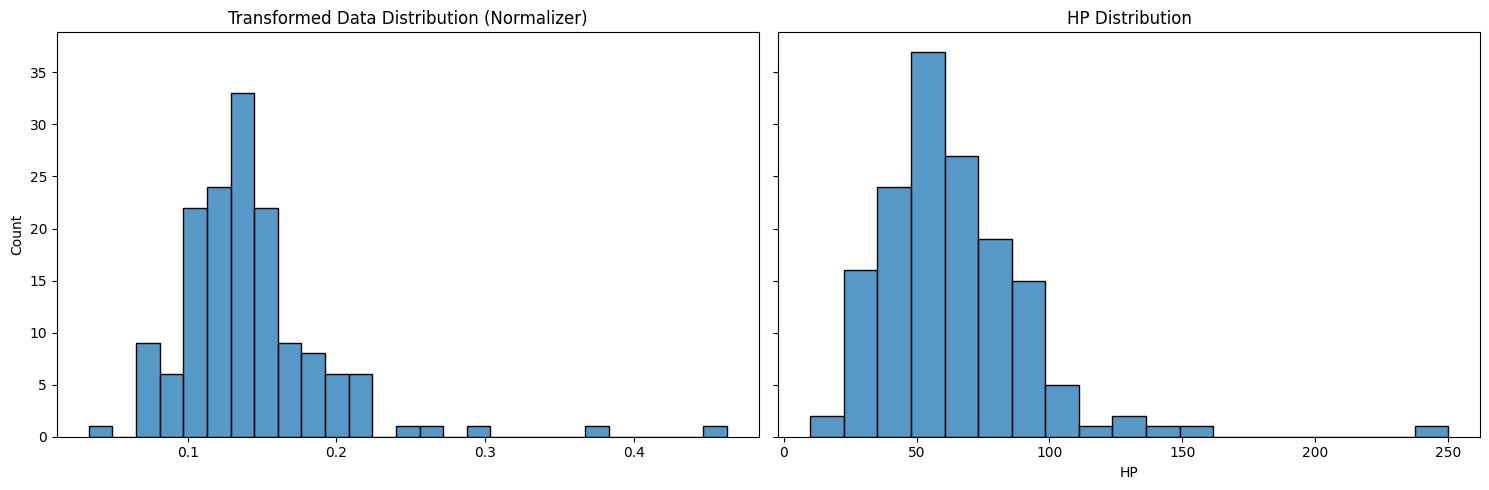

In [ ]:
# Fit the Normalizer to the data and transform it
power_transform_norm = preprocessing.Normalizer().fit(pokemon_df.drop(['Name', 'Type_1', 'Type_2'], axis=1))
transformed_norm = power_transform_norm.transform(pokemon_df.drop(['Name', 'Type_1', 'Type_2'], axis=1))[:, 2]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Plot the distribution of transformed_norm data on the first subplot
sns.histplot(transformed_norm, ax=axes[0])

# Plot the distribution of 'HP' column from pokemon_df on the second subplot
sns.histplot(pokemon_df['HP'], ax=axes[1])

# Add labels/titles as needed
axes[0].set_title('Transformed Data Distribution (Normalizer)')
axes[1].set_title('HP Distribution')

plt.tight_layout()
plt.show()

#### Excercise 4: perform operations not used in lection

#### PowerTransform

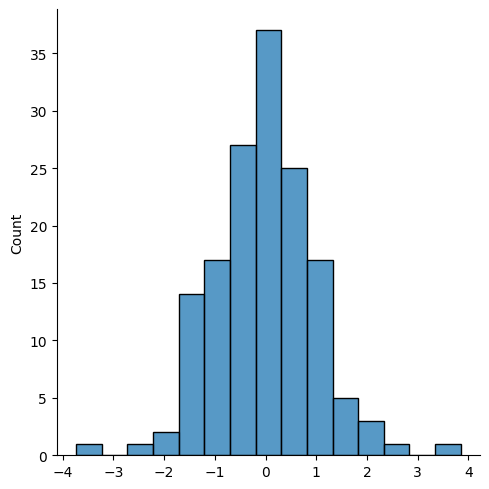

In [ ]:
power_transform_norm = preprocessing.PowerTransformer().fit(pokemon_df.drop(['Name','Type_1', 'Type_2'], axis=1))
transformed_norm = power_transform_norm.transform(pokemon_df.drop(['Name','Type_1', 'Type_2'], axis=1)) [:,2]
sns.displot(transformed_norm)

#### PolynomialFeatures

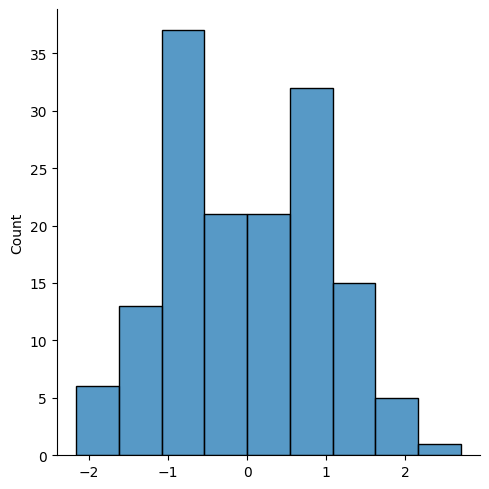

In [ ]:
power_transform_pol = preprocessing.PolynomialFeatures().fit(pokemon_df.drop(['Name','Type_1', 'Type_2'], axis=1))
transformed_norm = power_transform_norm.transform(pokemon_df.drop(['Name','Type_1', 'Type_2'], axis=1)) [:,1]
sns.displot(transformed_norm)

#### PCA

#### Exercise 5: compute this operation with mutual infromation from lection

In [ ]:
from sklearn import metrics

#### Exercise 6: compute mutual info score between HP, Atack, Defence, Sp_Atk, Sp_Def and total.

#### Exercise 7: construct regression and classification from lection

#### LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg_est = LinearRegression()\
    .fit(pokemon_df[['HP', 'Attack', 'Defense']],
         pokemon_df['Total'])

In [ ]:
pokemon_df['Predicted Total'] = linear_reg_est\
    .predict(pokemon_df[['HP', 'Attack', 'Defense']])

<Axes: >

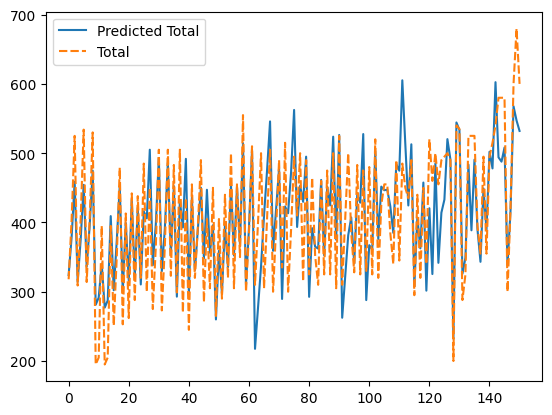

In [ ]:
sns.lineplot(data=pokemon_df[['Predicted Total', 'Total']])

#### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
nearest_estimator = KNeighborsClassifier()\
    .fit(pokemon_df[['HP', 'Attack', 'Defense']], pokemon_df['Stage'])

In [ ]:
# X = pokemon_df[['HP', 'Attack', 'Defense']]
# Target = pokemon_df['Stage']

#### Exercise 8: perform train/test split from lection

#### Exercise 9: create pipeline from scaler, normalizer, polynomial features, PCA and Linear regression, split sample to train and test, fit the pipeline on train and then predict it on test